https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653

In [77]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [78]:
df = pd.read_csv('AAPL.csv')

In [79]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [80]:
df.shape

(10033, 7)

In [81]:
df_new = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [82]:
# Sort DataFrame by date
df_new = df_new.sort_values('Date')

# Double check the result
df_new.head(100)

,Date,Close,Open,High,Low
0,1980-12-12,0.128348,0.128348,0.128906,0.128348
1,1980-12-15,0.121652,0.122210,0.122210,0.121652
2,1980-12-16,0.112723,0.113281,0.113281,0.112723
3,1980-12-17,0.115513,0.115513,0.116071,0.115513
4,1980-12-18,0.118862,0.118862,0.119420,0.118862
...,...,...,...,...,...
95,1981-04-30,0.126674,0.126674,0.127790,0.126674
96,1981-05-01,0.126674,0.126674,0.127790,0.126674
97,1981-05-04,0.126116,0.126674,0.126674,0.126116
98,1981-05-05,0.125558,0.126116,0.126116,0.125558


In [83]:
df_new.shape

(10033, 5)

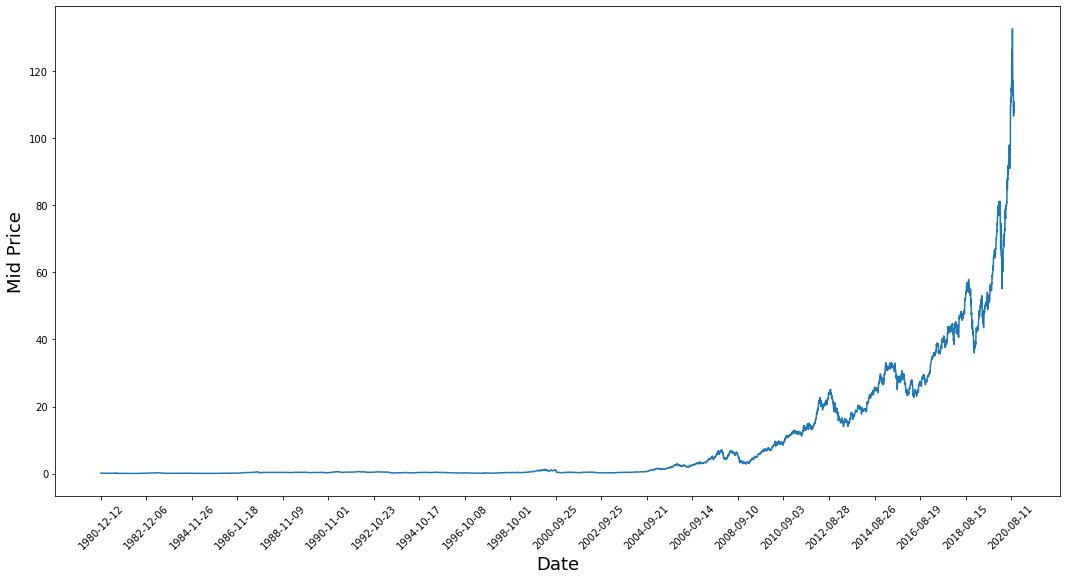

In [84]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [85]:
# Splitting Data into a Training set and a Test set
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [86]:
mid_prices.shape

(10033,)

In [87]:
(mid_prices.shape[0])*0.8

8026.400000000001

In [88]:
train_data = mid_prices[:int((mid_prices.shape[0])*0.8)] 
test_data = mid_prices[int((mid_prices.shape[0])/0.8):]

In [89]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [90]:
test_data.shape

(0, 1)

In [91]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [92]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.